In [1]:
import tensorflow as tf


In [2]:
from tensorflow.keras.layers import Input,Dense,SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

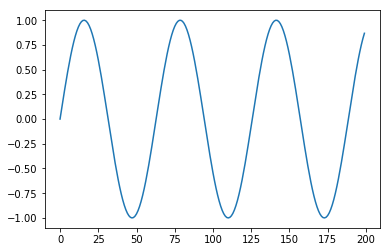

In [12]:
series=np.sin(0.1*np.arange(200)) #+ np.random.randn(200)*0.1
plt.plot(series)
plt.show();

In [14]:
T=10
X=[]
Y=[]
for t in range(len(series)-T):
    x=series[t:t+T]
    X.append(x)
    y=series[t+T]
    Y.append(y)
print(X[2],Y[1])    
X=np.array(X).reshape(-1,T,1)
Y=np.array(Y)
N=len(X)

[0.19866933 0.29552021 0.38941834 0.47942554 0.56464247 0.64421769
 0.71735609 0.78332691 0.84147098 0.89120736] 0.8912073600614354


In [16]:
i=Input(shape=(T,1))
x=SimpleRNN(15,activation='relu')(i)
x=Dense(1)(x)
model=Model(i,x)
model.compile(loss='mse',optimizer=Adam(lr=0.001),)
r=model.fit(X[:-N//2],Y[:-N//2],epochs=80,validation_data=(X[N//2:],Y[N//2:]),)

Train on 95 samples, validate on 95 samples
Epoch 1/80
95/95 [==============================] - 2s 19ms/sample - loss: 1.1238 - val_loss: 0.7552
Epoch 2/80
95/95 [==============================] - 0s 298us/sample - loss: 1.0132 - val_loss: 0.6734
Epoch 3/80
95/95 [==============================] - 0s 194us/sample - loss: 0.9304 - val_loss: 0.6119
Epoch 4/80
95/95 [==============================] - 0s 426us/sample - loss: 0.8657 - val_loss: 0.5600
Epoch 5/80
95/95 [==============================] - 0s 206us/sample - loss: 0.8046 - val_loss: 0.5155
Epoch 6/80
95/95 [==============================] - 0s 350us/sample - loss: 0.7549 - val_loss: 0.4738
Epoch 7/80
95/95 [==============================] - 0s 294us/sample - loss: 0.7105 - val_loss: 0.4378
Epoch 8/80
95/95 [==============================] - 0s 354us/sample - loss: 0.6659 - val_loss: 0.4094
Epoch 9/80
95/95 [==============================] - 0s 298us/sample - loss: 0.6288 - val_loss: 0.3859
Epoch 10/80
95/95 [====================

95/95 [==============================] - 0s 483us/sample - loss: 3.0035e-04 - val_loss: 2.3643e-04
Epoch 78/80
95/95 [==============================] - 0s 301us/sample - loss: 3.1015e-04 - val_loss: 2.2509e-04
Epoch 79/80
95/95 [==============================] - 0s 238us/sample - loss: 2.9061e-04 - val_loss: 2.2297e-04
Epoch 80/80
95/95 [==============================] - 0s 324us/sample - loss: 2.9820e-04 - val_loss: 2.1360e-04


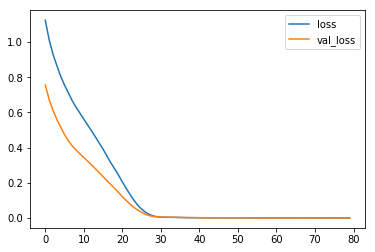

In [17]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [20]:
validation_target=Y[N//2:]
validation_pred=[]
last_x=X[N//2]
print(last_x)
while len(validation_target)>len(validation_pred):
    print(last_x.reshape(1,-1)[0][0])
    p=model.predict(last_x.reshape(1,-1,1))[0][0]
    validation_pred.append(p)
    last_x=np.roll(last_x,-1)
    last_x[-1]=p
    print(last_x)

[[-0.07515112]
 [-0.17432678]
 [-0.27176063]
 [-0.36647913]
 [-0.45753589]
 [-0.54402111]
 [-0.62507065]
 [-0.69987469]
 [-0.76768581]
 [-0.82782647]]
-0.0751511204618093
[[-0.17432678]
 [-0.27176063]
 [-0.36647913]
 [-0.45753589]
 [-0.54402111]
 [-0.62507065]
 [-0.69987469]
 [-0.76768581]
 [-0.82782647]
 [-0.86645138]]
-0.1743267812229814
[[-0.27176063]
 [-0.36647913]
 [-0.45753589]
 [-0.54402111]
 [-0.62507065]
 [-0.69987469]
 [-0.76768581]
 [-0.82782647]
 [-0.86645138]
 [-0.91306198]]
-0.2717606264109442
[[-0.36647913]
 [-0.45753589]
 [-0.54402111]
 [-0.62507065]
 [-0.69987469]
 [-0.76768581]
 [-0.82782647]
 [-0.86645138]
 [-0.91306198]
 [-0.9430933 ]]
-0.3664791292519284
[[-0.45753589]
 [-0.54402111]
 [-0.62507065]
 [-0.69987469]
 [-0.76768581]
 [-0.82782647]
 [-0.86645138]
 [-0.91306198]
 [-0.9430933 ]
 [-0.95807517]]
-0.45753589377532133
[[-0.54402111]
 [-0.62507065]
 [-0.69987469]
 [-0.76768581]
 [-0.82782647]
 [-0.86645138]
 [-0.91306198]
 [-0.9430933 ]
 [-0.95807517]
 [-0.9726

[[-1.11627972]
 [-1.12130916]
 [-1.11092246]
 [-1.09513319]
 [-1.07454038]
 [-1.0454973 ]
 [-1.00874579]
 [-0.96799111]
 [-0.91500866]
 [-0.85315037]]
-1.1162797212600708
[[-1.12130916]
 [-1.11092246]
 [-1.09513319]
 [-1.07454038]
 [-1.0454973 ]
 [-1.00874579]
 [-0.96799111]
 [-0.91500866]
 [-0.85315037]
 [-0.78028429]]
-1.1213091611862183
[[-1.11092246]
 [-1.09513319]
 [-1.07454038]
 [-1.0454973 ]
 [-1.00874579]
 [-0.96799111]
 [-0.91500866]
 [-0.85315037]
 [-0.78028429]
 [-0.69787359]]
-1.1109224557876587
[[-1.09513319]
 [-1.07454038]
 [-1.0454973 ]
 [-1.00874579]
 [-0.96799111]
 [-0.91500866]
 [-0.85315037]
 [-0.78028429]
 [-0.69787359]
 [-0.60818481]]
-1.0951331853866577
[[-1.07454038]
 [-1.0454973 ]
 [-1.00874579]
 [-0.96799111]
 [-0.91500866]
 [-0.85315037]
 [-0.78028429]
 [-0.69787359]
 [-0.60818481]
 [-0.52039671]]
-1.074540376663208
[[-1.0454973 ]
 [-1.00874579]
 [-0.96799111]
 [-0.91500866]
 [-0.85315037]
 [-0.78028429]
 [-0.69787359]
 [-0.60818481]
 [-0.52039671]
 [-0.425442

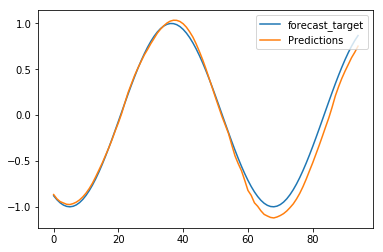

In [21]:
plt.plot(validation_target,label='forecast_target')
plt.plot(validation_pred,label='Predictions')
plt.legend()